In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 3.2MB/s 


In [1]:
from hmmlearn import hmm

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

File 'SPY.csv' already there; not retrieving.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [20]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [22]:
returns = np.log(df['Close']).diff()

In [23]:
returns.dropna(inplace=True)

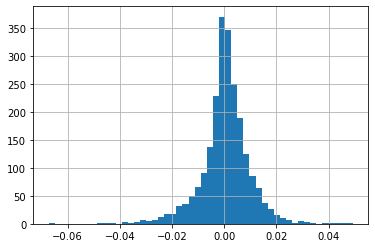

In [24]:
returns.hist(bins=50);

In [25]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [26]:
X = returns.to_numpy().reshape(-1, 1)
model.fit(X)

GaussianHMM(n_components=2)

In [27]:
Z = model.predict(X)

In [28]:
Z

array([0, 0, 0, ..., 1, 0, 0])

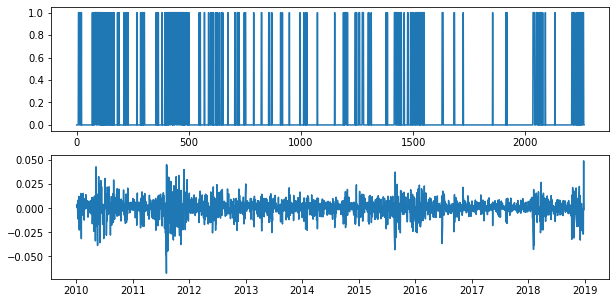

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

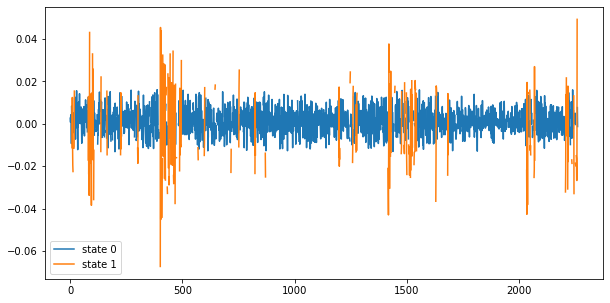

In [30]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();

In [31]:
# transition matrix
model.transmat_

array([[0.7579454 , 0.2420546 ],
       [0.54731232, 0.45268768]])

In [16]:
# try to set the transition matrix intuitively
model.transmat_ = np.array([
  [0.999, 0.001],
  [0.001, 0.999],                           
])

In [17]:
# run inference again
Z = model.predict(X)

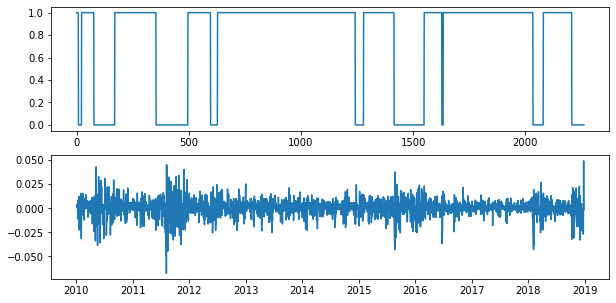

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

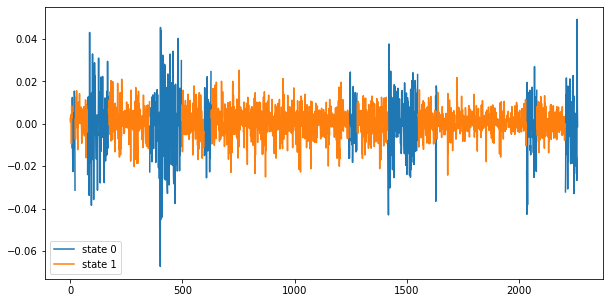

In [19]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();